In [11]:
from pytorchcv.model_provider import get_model as ptcv_get_model
from torchvision.models import *
import pretrainedmodels
from sklearn.metrics import balanced_accuracy_score

from fastai.vision import *
from fastai.vision.models import *
from fastai.vision.learner import model_meta
from fastai.callbacks import SaveModelCallback
from sklearn.metrics import confusion_matrix
from utils import *
import sys

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
#choose the relevant data loader based on your data structure

In [2]:
# bs = 10        
# size = 448      
# path = Path("./data")   
# tfms = get_transforms()
# data = ImageDataBunch.from_csv('data', csv_labels='10000_metadata.csv', suffix='.jpg', fn_col=1, label_col=2, 
#                                ds_tfms=tfms, valid_pct = 0.2,size=size, bs=bs)
# print('Transforms = ', len(tfms))
# data.save('imageDataBunch-bs-'+str(bs)+'-size-'+str(size)+'.pkl')
# print(data.classes)
# data

In [2]:
bs = 20
size = 448      
path = Path("./data")   
tfms = get_transforms()
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, valid_pct = 0.2,size=size, bs=bs)
print('Transforms = ', len(tfms))
data.save('imageDataBunch-bs-'+str(bs)+'-size-'+str(size)+'.pkl')
print(data.classes)
data

Transforms =  2
['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'other', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


ImageDataBunch;

Train: LabelList (19125 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
other,other,other,other,other
Path: data;

Valid: LabelList (4781 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
nevus,melanoma,melanoma,nevus,nevus
Path: data;

Test: None

In [3]:
m = ptcv_get_model("efficientnet_b0", pretrained=True)

In [4]:
m

EfficientNet(
  (features): Sequential(
    (init_block): EffiInitBlock(
      (conv): ConvBlock(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activ): Swish()
      )
    )
    (stage1): Sequential(
      (unit1): EffiDwsConvUnit(
        (dw_conv): ConvBlock(
          (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (activ): Swish()
        )
        (se): SEBlock(
          (pool): AdaptiveAvgPool2d(output_size=1)
          (conv1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (activ): Swish()
          (conv2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
          (sigmoid): Sigmoid()
        )
        (pw_conv): ConvBlock(
          (conv): Conv2d(32, 16, kernel_

In [5]:
output_size = m.output[1].in_features

In [6]:
    def efficientnet_b0(pretrained=True):
    return ptcv_get_model("efficientnet_b0", pretrained=True).features

In [7]:
learn = cnn_learner(data, efficientnet_b0, pretrained=True,
                    cut=noop, metrics=[FBeta('macro', beta=1), accuracy], split_on=lambda m: (m[0][4], m[1]))

In [8]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,f_beta,accuracy,time
0,0.827309,0.614482,0.394338,0.797950,07:21
1,0.625650,0.516429,0.428391,0.819076,07:40
2,0.599242,0.450054,0.474094,0.832253,07:52
3,0.503112,0.411495,0.565356,0.856934,07:56
4,0.415118,0.398888,0.569342,0.858607,07:58
5,0.409965,0.385549,0.564542,0.858398,07:58
6,0.423065,0.370073,0.613153,0.865928,07:59
7,0.398997,0.360019,0.622194,0.871366,07:57
8,0.346915,0.350189,0.625264,0.872830,07:59
9,0.343169,0.351535,0.632137,0.873457,07:56


In [15]:
learn.save('efficient-0')

In [10]:
interp = ClassificationInterpretation.from_learner(learn)

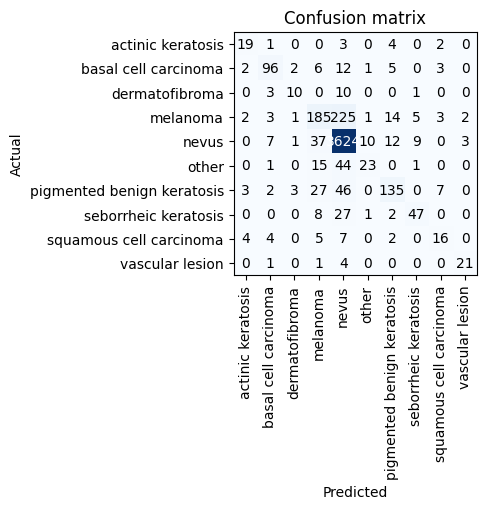

In [11]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=100)

In [8]:
learn.load('efficient-0')

Learner(data=ImageDataBunch;

Train: LabelList (19125 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
other,other,other,other,other
Path: data;

Valid: LabelList (4781 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
nevus,melanoma,melanoma,nevus,nevus
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (init_block): EffiInitBlock(
      (conv): ConvBlock(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activ): Swish()
      )
    )
    (stage1): Sequential(
      (unit1): EffiDwsConvUnit(
        (dw_conv): ConvBlock(
          (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn): BatchNorm2d(32,

epoch,train_loss,valid_loss,f_beta,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-06
Min loss divided by 10: 7.59E-06


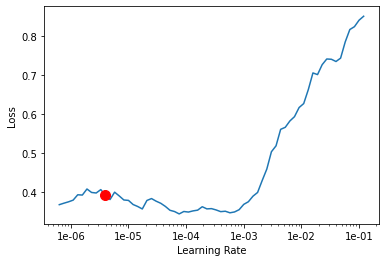

In [9]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(30,max_lr=slice(1e-4,5e-5), callbacks=[SaveModelCallback(learn, every='epoch', monitor='accuracy', name='derma-1')])
learn.save('efficient-0-1')
# exportStageTo(learn, path)

epoch,train_loss,valid_loss,f_beta,accuracy,time
0,0.305290,0.292231,0.701979,0.891236,07:15
1,0.336394,0.289255,0.713876,0.896883,07:22
2,0.314385,0.285703,0.714620,0.896047,07:35
3,0.309633,0.289893,0.715949,0.900230,07:47


In [ ]:
learn.load('efficient1-2') 

In [ ]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(5,max_lr=slice(1e-5,1e-6))

In [ ]:
learn.save('efficient-best')